# Multi-level Regression

In [1]:
import arviz as az
import bambi as bmb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import statsmodels.api as sm

In [2]:
az.style.use('arviz-darkgrid')
np.random.seed(1234)

In [3]:
data = sm.datasets.get_rdataset('dietox', 'geepack').data

In [4]:
prior_dict = {
    'Intercept': 'superwide', 
    'Time': 'superwide',
    '1|Pig_sigma': 'superwide', 
    'Time|Pig_sigma': 'superwide', 
    'Weight_sigma': 'superwide'
}
model1 = bmb.Model(data)
results = model1.fit('Weight ~ Time + (Time|Pig)', priors=prior_dict)

model2 = bmb.Model(data)
results = model2.fit('Weight ~ Time + (Time|Pig)')


prior_dict = {
    'Intercept': 'medium', 
    'Time': 'medium',
    '1|Pig_sigma': 'medium', 
    'Time|Pig_sigma': 'medium', 
    'Weight_sigma': 'medium'
}
model3 = bmb.Model(data)
results = model3.fit('Weight ~ Time + (Time|Pig)', priors=prior_dict)

prior_dict = {
    'Intercept': 'narrow', 
    'Time': 'narrow',
    '1|Pig_sigma': 'narrow', 
    'Time|Pig_sigma': 'narrow', 
    'Weight_sigma': 'narrow'
}
model4 = bmb.Model(data)
results = model4.fit('Weight ~ Time + (Time|Pig)', priors=prior_dict)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Weight_sigma, Time|Pig_offset, Time|Pig_sigma, 1|Pig_offset, 1|Pig_sigma, Time, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 30 seconds.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Weight_sigma, Time|Pig_offset, Time|Pig_sigma, 1|Pig_offset, 1|Pig_sigma, Time, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 23 seconds.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Weight_sigma, Time|Pig_offset, Time|Pig_sigma, 1|Pig_offset, 1|Pig_sigma, Time, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 21 seconds.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Weight_sigma, Time|Pig_offset, Time|Pig_sigma, 1|Pig_offset, 1|Pig_sigma, Time, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 25 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [5]:
draws = 5000
random_seed = 1234
var_names = ['Intercept', 'Time', '1|Pig_sigma', 'Time|Pig_sigma']

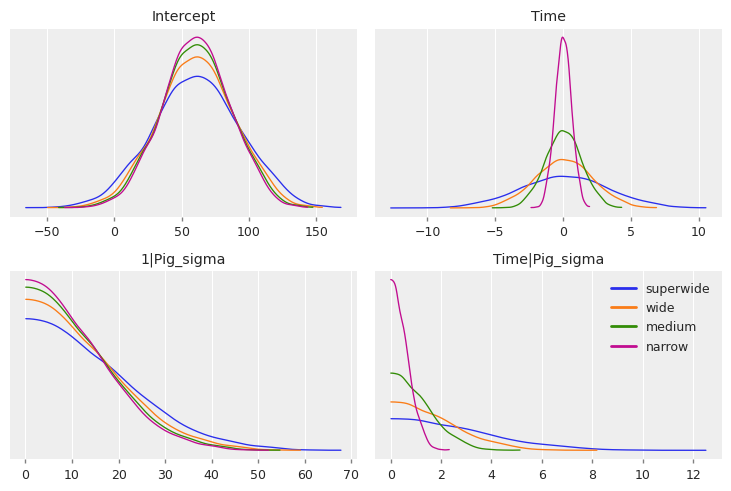

In [6]:
pps1 = model1.prior_predictive(draws=draws, var_names=var_names, random_seed=random_seed)
pps2 = model2.prior_predictive(draws=draws, var_names=var_names, random_seed=random_seed)
pps3 = model3.prior_predictive(draws=draws, var_names=var_names, random_seed=random_seed)
pps4 = model4.prior_predictive(draws=draws, var_names=var_names, random_seed=random_seed)

colors = ["#2A2EEC", "#FA7C17", "#328C06", "#C10C90"]
labels = ["superwide", "wide", "medium", "narrow"]
handles = []

fig, ax = plt.subplots(2, 2)

for idx, pps in enumerate([pps1, pps2, pps3, pps4]):
    ax = az.plots.plot_posterior(
        pps,
        group="prior",
        round_to=2,
        hdi_prob="hide",
        point_estimate=None,
        kind="kde",
        ax=ax,
        color=f"C{idx}",
        textsize=9
    )
    handles.append(mlines.Line2D([], [], color=colors[idx], label=labels[idx], lw=2)) 

plt.legend(handles=handles, loc="upper right", fontsize=9);    
plt.savefig("imgs/pigs_priors.png")  